# **Pokemon Team Matchup**
Nama Lengkap : Shaffira Alya Mevia\
NIM : 13519083\
Asal Universitas : Institut Teknologi Bandung\
Tanggal : 13 November 2020\
Sumber Dataset : [Complete Pokemon Dataset](https://www.kaggle.com/mariotormo/complete-pokemon-dataset-updated-090420)


---
### **Problem Framing** 
Hasil dari eksplorasi ini adalah mendapatkan tim pokemon (satu tim berisi 6 pokemon) yang paling menguntungkan dalam pokemon battle. Tim tersebut harus memiliki persyaratan berikut :


1.   Setiap pokemon **maksimal** miliki damage multiplier 2 sebanyak 3 dan tidak boleh memiliki damage multiplier 4 sama sekali.
2.   Salah satu pokemon dapat menggunakan HM (Hidden Machine) yang sering digunakan, yaitu **Fly** dan **Surf**. Diasumsikan hanya pokemon yang bertipe Flying dapat menggunakan Fly dan pokemon yang bertipe Water dapat menggunakan surf.
3.   Pokemon juga akan diurut berdasarkan tingkat kemudahannya untuk ditangkap, namun bagian ini menjadi pertimbangan terakhir.


## **To Do List :v**


*   ~~Clean Data to get only name, type_number, type_1, type_2, catch_rate, againts_xx~~
*   ~~Count how many 1/0.5/2 multiplier perpokemon~~
*   ~~Rank that~~
*   ~~Graph that~~
*   ~~Rank per catch_rate and againts_xx stats~~
*   Create the 6 team pokemon



In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Data Preparation**
Dari dataset yang ada, hanya akan diambil kolom 
```
name, total_points, type_1, type_2, catch_rate, againts_xx
```
dengan xx yang diisi dengan semua type pokemon yang ada. Selain itu juga, melihat beberapa informasi dari dataset seperti data statistiknya ataupun info untuk setiap kolomnya.


In [2]:
# Load Dataset
df = pd.read_csv('pokedex_(Update_05.20).csv')

In [3]:
# Melihat Data
df.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [4]:
# Melihat data statistik untuk dataset
df.describe()

,Unnamed: 0,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,egg_type_number,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,924.000000,924.000000,924.000000,1028.000000,792.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,513.500000,437.711089,4.034047,1.527237,1.368093,69.753749,2.284047,437.571984,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047,93.172078,64.139610,153.814935,1.271401,55.003157,30.316456,0.868434,1.125486,1.053502,1.034290,1.004134,1.196498,1.078794,0.952335,1.084630,1.166342,0.979329,0.992461,1.239786,1.010700,0.975681,1.065661,0.980302,1.084874
std,296.902341,259.366480,2.234937,0.499501,3.380126,129.221230,0.794981,121.664910,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103,75.240630,21.455464,79.270628,0.451417,20.182675,28.942912,0.286236,0.717742,0.613411,0.645167,0.748527,0.759471,0.754969,0.542982,0.784937,0.593030,0.499146,0.598301,0.699156,0.558533,0.377549,0.451054,0.503434,0.527743
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000,36.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,256.750000,213.750000,2.000000,1.000000,0.600000,8.800000,2.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,70.000000,67.000000,1.000000,50.000000,20.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,513.500000,433.500000,4.000000,2.000000,1.000000,28.500000,2.000000,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000,60.000000,70.000000,159.000000,1.000000,50.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,770.250000,663.250000,6.000000,2.000000,1.500000,69.100000,3.000000,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,70.000000,201.500000,2.000000,50.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.625000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1027.000000,890.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000,255.000000,140.000000,608.000000,2.000000,100.000000,120.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


In [5]:
# Melihat info untuk dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


In [6]:
# Mengambil Kolom dari Data yang Hanya diperlukan
pkmn = df[['name', 'generation', 'total_points', 'type_1', 'type_2', 'catch_rate', 'against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark', 'against_steel', 'against_fairy']]

pkmn.head()

,name,generation,total_points,type_1,type_2,catch_rate,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,Bulbasaur,1,318.0,Grass,Poison,45.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,1,405.0,Grass,Poison,45.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,1,525.0,Grass,Poison,45.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Mega Venusaur,1,625.0,Grass,Poison,45.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Charmander,1,309.0,Fire,NaN,45.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


## **Data Preprocessing**
Membuat dataset yang ada menjadi lebih mudah untuk dipahami. Pada kolom ``againts_xxx`` ada terlalu banyak, maka akan diubah menjadi jumlah multipliernya. Kemudian handling untuk kasus null untuk beberapa kolom tertentu. \

Selain itu, untuk beberapa pokemon yang memiliki Mega Evolution akan dihapus karena hanya diaktifkan dalam kondisi tertentu saja. 



In [7]:
# Membuat kolom againts_xx menjadi multipliernya
#cond = (pkmn['against_normal'] == 2.0) | (pkmn['against_fire'] == 2.0) | (pkmn['against_water'] == 2.0) | (pkmn['against_electric'] == 2.0) | (pkmn['against_grass'] == 2.0) | (pkmn['against_ice'] == 2.0) | (pkmn['against_fight'] == 2.0) | (pkmn['against_poison'] == 2.0) | (pkmn['against_ground'] == 2.0) | (pkmn['against_flying'] == 2.0) | (pkmn['against_psychic'] == 2.0) | (pkmn['against_bug'] == 2.0) | (pkmn['against_rock'] == 2.0) | (pkmn['against_ghost'] == 2.0) | (pkmn['against_dragon'] == 2.0) | (pkmn['against_dark'] == 2.0) | (pkmn['against_steel'] == 2.0) | (pkmn['against_fairy'] == 2.0)
# Inisialisasi
pkmn['mult_05'] = 0;
pkmn['mult_1'] = 0;
pkmn['mult_2'] = 0;
pkmn['mult_4'] = 0;

# Operasi (Sangat Tidak Efektif :( )
pkmn['mult_05'] += np.where(pkmn['against_normal'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_normal'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_normal'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_normal'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_fire'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_fire'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_fire'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_fire'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_water'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_water'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_water'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_water'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_electric'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_electric'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_electric'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_electric'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_grass'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_grass'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_grass'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_grass'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_ice'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_ice'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_ice'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_ice'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_fight'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_fight'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_fight'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_fight'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_poison'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_poison'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_poison'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_poison'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_ground'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_ground'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_ground'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_ground'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_flying'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_flying'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_flying'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_flying'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_psychic'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_psychic'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_psychic'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_psychic'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_bug'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_bug'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_bug'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_bug'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_rock'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_rock'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_rock'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_rock'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_ghost'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_ghost'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_ghost'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_ghost'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_dragon'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_dragon'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_dragon'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_dragon'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_dark'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_dark'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_dark'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_dark'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_steel'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_steel'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_steel'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_steel'] == 4.0, 0, -1) + 1

pkmn['mult_05'] += np.where(pkmn['against_fairy'] == 0.5, 0, -1) + 1
pkmn['mult_1'] += np.where(pkmn['against_fairy'] == 1.0, 0, -1) + 1
pkmn['mult_2'] += np.where(pkmn['against_fairy'] == 2.0, 0, -1) + 1
pkmn['mult_4'] += np.where(pkmn['against_fairy'] == 4.0, 0, -1) + 1

#mult_2
pkmn.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,name,generation,total_points,type_1,type_2,catch_rate,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,mult_05,mult_1,mult_2,mult_4
0,Bulbasaur,1,318.0,Grass,Poison,45.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,4,9,4,0
1,Ivysaur,1,405.0,Grass,Poison,45.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,4,9,4,0
2,Venusaur,1,525.0,Grass,Poison,45.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,4,9,4,0
3,Mega Venusaur,1,625.0,Grass,Poison,45.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,4,11,2,0
4,Charmander,1,309.0,Fire,NaN,45.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,6,9,3,0


In [8]:
# Merapihkan Column
pkmn_mult = pkmn.drop(columns=['against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark', 'against_steel', 'against_fairy'])
pkmn_mult

,name,generation,total_points,type_1,type_2,catch_rate,mult_05,mult_1,mult_2,mult_4
0,Bulbasaur,1,318.0,Grass,Poison,45.0,4,9,4,0
1,Ivysaur,1,405.0,Grass,Poison,45.0,4,9,4,0
2,Venusaur,1,525.0,Grass,Poison,45.0,4,9,4,0
3,Mega Venusaur,1,625.0,Grass,Poison,45.0,4,11,2,0
4,Charmander,1,309.0,Fire,NaN,45.0,6,9,3,0
...,...,...,...,...,...,...,...,...,...,...
1023,Zacian Hero of Many Battles,8,670.0,Fairy,NaN,NaN,3,12,2,0
1024,Zamazenta Crowned Shield,8,720.0,Fighting,Steel,NaN,6,6,3,0
1025,Zamazenta Hero of Many Battles,8,670.0,Fighting,NaN,NaN,3,12,3,0
1026,Eternatus,8,690.0,Poison,Dragon,NaN,6,7,4,0


In [9]:
# Mengecek informasi dataframe
pkmn_mult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1028 non-null   object 
 1   generation    1028 non-null   int64  
 2   total_points  1028 non-null   float64
 3   type_1        1028 non-null   object 
 4   type_2        542 non-null    object 
 5   catch_rate    924 non-null    float64
 6   mult_05       1028 non-null   int64  
 7   mult_1        1028 non-null   int64  
 8   mult_2        1028 non-null   int64  
 9   mult_4        1028 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 80.4+ KB


In [10]:
# Handling Kasus NaN Value
pkmn_mult['type_2'] = pkmn_mult['type_2'].fillna('None')
pkmn_mult['catch_rate'] = pkmn_mult['catch_rate'].fillna(0)

# Recheck kondisi dataframe
pkmn_mult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1028 non-null   object 
 1   generation    1028 non-null   int64  
 2   total_points  1028 non-null   float64
 3   type_1        1028 non-null   object 
 4   type_2        1028 non-null   object 
 5   catch_rate    1028 non-null   float64
 6   mult_05       1028 non-null   int64  
 7   mult_1        1028 non-null   int64  
 8   mult_2        1028 non-null   int64  
 9   mult_4        1028 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 80.4+ KB


In [11]:
# Menghapus pokemon dengan Mega Evolution
# Keyword : Mega, Primal, Eternamax

pkmn_mult = pkmn_mult.loc[~pkmn_mult['name'].str.contains('Mega')]
pkmn_mult = pkmn_mult.loc[~pkmn_mult['name'].str.contains('Primal')]
pkmn_mult = pkmn_mult.loc[~pkmn_mult['name'].str.contains('Eternamax')]
pkmn_mult.head()

,name,generation,total_points,type_1,type_2,catch_rate,mult_05,mult_1,mult_2,mult_4
0,Bulbasaur,1,318.0,Grass,Poison,45.0,4,9,4,0
1,Ivysaur,1,405.0,Grass,Poison,45.0,4,9,4,0
2,Venusaur,1,525.0,Grass,Poison,45.0,4,9,4,0
4,Charmander,1,309.0,Fire,None,45.0,6,9,3,0
5,Charmeleon,1,405.0,Fire,None,45.0,6,9,3,0


## **Data Visualization**
Visualisasi untuk dataframe yang sudah di preprocess.



In [12]:
# Sort Dataframe berdasarkan total_points, namun tidak boleh ada mult_4
pkmn_sort_tl = pkmn_mult.loc[pkmn_mult['mult_4'] == 0].sort_values('total_points', ascending=False)
pkmn_sort_tl.reset_index()

,index,name,generation,total_points,type_1,type_2,catch_rate,mult_05,mult_1,mult_2,mult_4
0,930,Ultra Necrozma,7,754.0,Psychic,Dragon,3.0,6,6,6,0
1,1024,Zamazenta Crowned Shield,8,720.0,Fighting,Steel,0.0,6,6,3,0
2,584,Arceus,4,720.0,Normal,None,3.0,0,16,1,0
3,1022,Zacian Crowned Sword,8,720.0,Fairy,Steel,0.0,8,5,2,0
4,749,Black Kyurem,5,700.0,Dragon,Ice,3.0,3,10,5,0
...,...,...,...,...,...,...,...,...,...,...,...
786,478,Kricketot,4,194.0,Bug,None,255.0,3,12,3,0
787,351,Azurill,3,190.0,Normal,Fairy,150.0,4,10,2,0
788,232,Sunkern,2,180.0,Grass,None,235.0,4,9,5,0
789,954,Blipbug,8,180.0,Bug,None,0.0,3,12,3,0


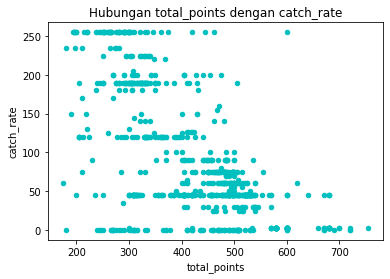

In [13]:
# Visualisasi total_points dengan catch_rate
pkmn_sort_tl.plot.scatter(x = 'total_points', y = 'catch_rate', title ='Hubungan total_points dengan catch_rate', c='c')



*   Insight yang bisa didapat dari grafik ini adalah pokemon dengan total_points tinggi akan memiliki catch_rate yang sangat rendah.
*   Dari game mechanics Pokemon, kategori tersebut sebagian besar kemungkinan besar diisi dengan pokemon bertipe [Sub-Legendary/ Legendary/ Mythical Pokemon](https://www.serebii.net/pokemon/legendary.shtml).



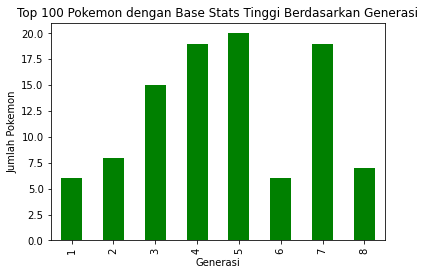

In [14]:
# Visualisasi Top 100 berdasarkan Generasi 
pkmn_sort_tl_gen100 = pkmn_sort_tl.loc[pkmn_mult['mult_4'] == 0].iloc[0:100].reset_index()
pkmn_sort_tl_gen100['generation'].value_counts().sort_index().plot.bar(title="Top 100 Pokemon dengan Base Stats Tinggi Berdasarkan Generasi", xlabel="Generasi", ylabel="Jumlah Pokemon", color='Green')




*   Yuhu yuhu
*   List item



In [15]:
# Sort Dataframe berdasarkan  mult_2 dan total_points
# Prioritas disini adalah mult_2 terlebih dahulu baru total_points
pkmn_sort_2tl = pkmn_mult.loc[pkmn_mult['mult_4'] == 0].sort_values(['mult_2', 'total_points'], ascending=[1, 0])
pkmn_sort_2tl.reset_index()

,index,name,generation,total_points,type_1,type_2,catch_rate,mult_05,mult_1,mult_2,mult_4
0,928,Dusk Mane Necrozma,7,680.0,Psychic,Steel,3.0,8,4,0,0
1,929,Dawn Wings Necrozma,7,680.0,Psychic,Ghost,3.0,2,12,0,0
2,927,Necrozma,7,600.0,Psychic,None,255.0,2,13,0,0
3,702,Eelektross,5,515.0,Electric,None,30.0,3,14,0,0
4,663,Carracosta,5,495.0,Water,Rock,45.0,4,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
786,955,Dottler,8,335.0,Bug,Psychic,0.0,3,8,6,0
787,284,Smoochum,2,305.0,Ice,Psychic,45.0,2,10,6,0
788,404,Baltoy,3,300.0,Ground,Psychic,255.0,4,6,6,0
789,644,Sandile,5,292.0,Ground,Dark,180.0,4,6,6,0


In [16]:
# Melihat hasil diatas, untuk mendapatkan pokemon yang bagus memiliki catch_rate yang sangat kecil, 
# kita bisa melihat pokemon dengan stats bagus namun catch_rate lebih besar
# Prioritas : mult_2, total_points, catch_rate

pkmn_sort_2tlcr = pkmn_mult.loc[pkmn_mult['mult_4'] == 0].sort_values(['mult_2', 'total_points', 'catch_rate' ], ascending=[1, 0, 0])
pkmn_sort_2tlcr.reset_index()

,index,name,generation,total_points,type_1,type_2,catch_rate,mult_05,mult_1,mult_2,mult_4
0,928,Dusk Mane Necrozma,7,680.0,Psychic,Steel,3.0,8,4,0,0
1,929,Dawn Wings Necrozma,7,680.0,Psychic,Ghost,3.0,2,12,0,0
2,927,Necrozma,7,600.0,Psychic,None,255.0,2,13,0,0
3,702,Eelektross,5,515.0,Electric,None,30.0,3,14,0,0
4,663,Carracosta,5,495.0,Water,Rock,45.0,4,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
786,955,Dottler,8,335.0,Bug,Psychic,0.0,3,8,6,0
787,284,Smoochum,2,305.0,Ice,Psychic,45.0,2,10,6,0
788,404,Baltoy,3,300.0,Ground,Psychic,255.0,4,6,6,0
789,644,Sandile,5,292.0,Ground,Dark,180.0,4,6,6,0


In [31]:
# Berdasarkan data diatas, sepertinya catch_rate masih cukup rendah
# Sekarang kita akan batasi saja untuk catch_rate > 10, dengan ini semoga sudah tidak ada pokemon
# yang termasuk kedalam kategori Legendary. Kemudian ditambah juga mult_2 <= 3 agar sesuai dengan tujuan

pkmn_sort_2tlcr100 = pkmn_mult.loc[(pkmn_mult['catch_rate'] >= 45) & (pkmn_mult['mult_4'] == 0) & (pkmn_mult['mult_2'] <= 3)].sort_values(['total_points', 'mult_2'], ascending=False)
pkmn_sort_2tlcr100

,name,generation,total_points,type_1,type_2,catch_rate,mult_05,mult_1,mult_2,mult_4
831,Xerneas,6,680.0,Fairy,None,45.0,3,12,2,0
342,Slaking,3,670.0,Normal,None,45.0,0,16,1,0
872,Wishiwashi School Form,7,620.0,Water,None,60.0,4,12,2,0
191,Mew,1,600.0,Psychic,None,45.0,2,13,3,0
815,Goodra,6,600.0,Dragon,None,45.0,3,11,3,0
...,...,...,...,...,...,...,...,...,...,...
13,Caterpie,1,195.0,Bug,None,255.0,3,12,3,0
317,Wurmple,3,195.0,Bug,None,255.0,3,12,3,0
478,Kricketot,4,194.0,Bug,None,255.0,3,12,3,0
351,Azurill,3,190.0,Normal,Fairy,150.0,4,10,2,0


## **Model Development**
Membuat team berisi 6 pokemon yang sesuai dengan kriteria.



## **Presentation**
Hasil akhir dari proses pembuatan pokemon team matchup.

